In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import heapq

A)
В очереди может максимум стоять n человек, где n - количество окошек. Так как окошки перестают работать после 2-го клиента, то достаточно только один раз сгенерировать выборку из n элементов. Тогда время ожидания для i-го человека в очереди - i-я позиция в отсортированной выборке. Проведем эксперимент 100 раз.
Из графиков видно, что время ожидания экспоненциально зависит от места в очереди.

In [63]:
num_of_experiments = 100

In [64]:
def calc_waiting_time_q2(n, alpha):
    waiting_time = np.zeros(n)
    for _ in range(num_of_experiments):
        waiting_time += sorted(np.random.exponential(alpha, n))
    return waiting_time / num_of_experiments

In [58]:
def plot_waiting_time_q2(n, alpha):
    for ni in n:
        for alphai in alpha:
            plt.plot(np.arange(ni), calc_waiting_time_q2(ni, alphai), label='alpha = {}'.format(alphai))
            plt.legend()
        plt.ylabel('waiting time')
        plt.xlabel('len of queue')
        plt.show()

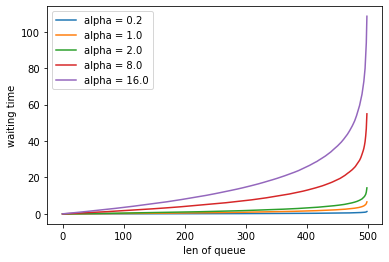

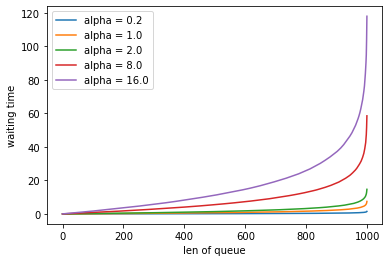

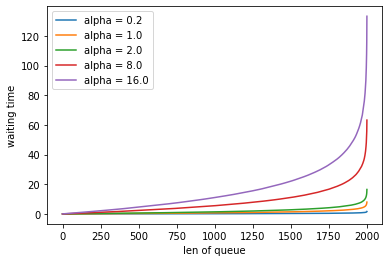

In [59]:
plot_waiting_time_q2(n=[500, 1000, 2000], alpha=[0.2, 1.0, 2.0, 8.0, 16.0])

B) m - количество человек в очереди. Создаем кучу, в которую изначально кладем выборку из n элементов для изначально занятых окон. m раз достаем из кучи минимальный элемент (cur_time) - время ожидания для соответствующего (i-го) человека в очереди - и кладем cur_time + (сгенерированное время обслуживания для i-го человека). Время ожидания линейно зависит от места в очереди.

In [62]:
def calc_waiting_time_qn(n, m, alpha):
    waiting_time = np.zeros(m)
    for _ in range(num_of_experiments):
        times = np.random.exponential(alpha, n).tolist()
        heap_times = heapq.heapify(times)
        for i in range(m):
            cur_time = heapq.heappop(times)
            waiting_time[i] += cur_time
            heapq.heappush(times, cur_time + np.random.exponential(alpha))
    return waiting_time / num_of_experiments

In [71]:
def plot_waiting_time_qn(n, m, alpha):
    for ni in n:
        for alphai in alpha:
            plt.plot(np.arange(ni + m), calc_waiting_time_qn(ni, ni + m, alphai), label='alpha = {}'.format(alphai))
            plt.legend()
            plt.ylabel('waiting time')
            plt.xlabel('len of queue')
        plt.show()

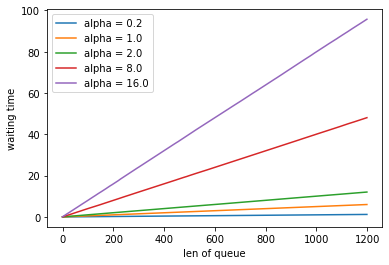

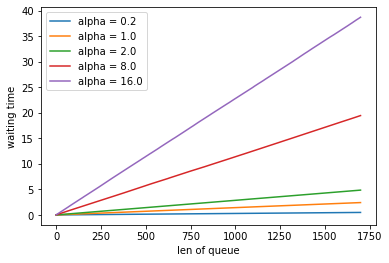

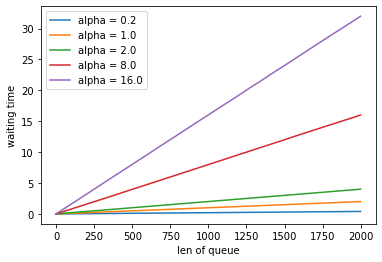

In [73]:
plot_waiting_time_qn(n=[200, 700, 1000], m=1000, alpha=[0.2, 1.0, 2.0, 8.0, 16.0])